In [2]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
# ms-python.python added
import os
try:
	os.chdir(os.path.join(os.getcwd(), '../..'))
	print(os.getcwd())
except:
	pass


/Users/bpedigo/JHU_code/maggot_models


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

from graspy.plot import gridplot, heatmap
from graspy.utils import binarize, pass_to_ranks
from src.data import load_metagraph
from src.visualization import CLASS_COLOR_DICT, adjplot

sns.set_context("talk")

mg = load_metagraph("G", version="2020-04-23")
mg.calculate_degrees(inplace=True)

adj = mg.adj  # adjacency matrix from the "mg" object
meta = mg.meta  # dataframe of node metadata


(<matplotlib.axes._subplots.AxesSubplot at 0x129060d90>,
 <matplotlib.axes._subplots.AxesSubplot at 0x129060d90>)

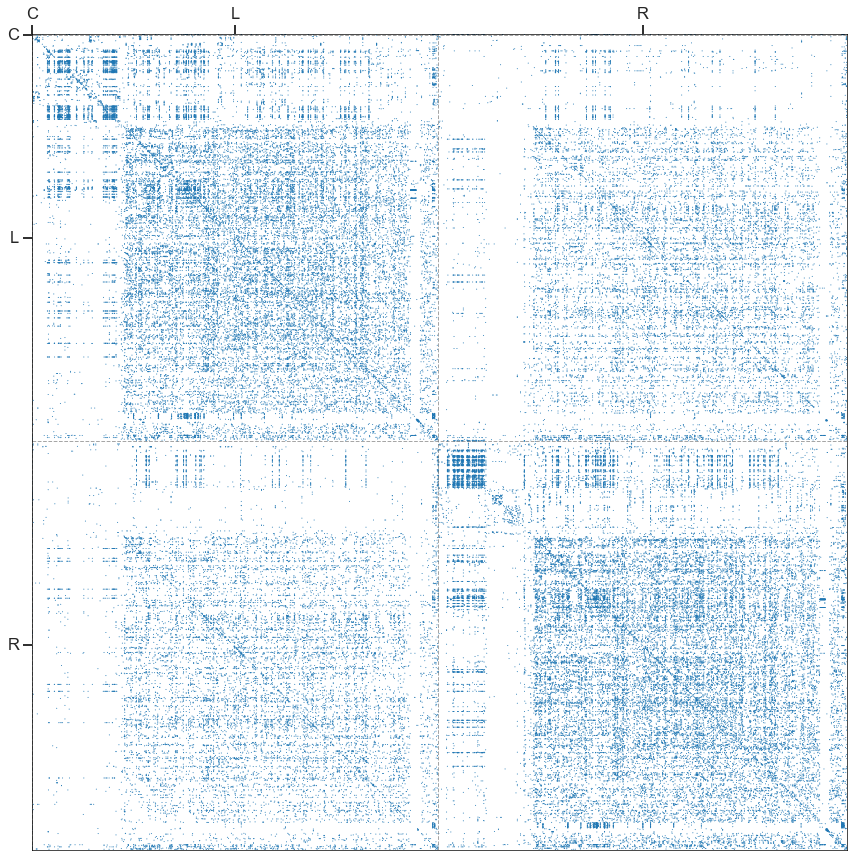

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
adjplot(
    adj,
    meta=meta,
    sort_class="hemisphere",  # group by hemisphere, this is a key for column in "meta"
    plot_type="scattermap",  # plot dots instead of a heatmap
    sizes=(1, 1),  # min and max sizes for dots, so this is effectively binarizing
    item_order="Pair ID",  # order by pairs (some have no pair here so don't look same)
    ax=ax,
)


(<matplotlib.axes._subplots.AxesSubplot at 0x13d53b990>,
 <matplotlib.axes._subplots.AxesSubplot at 0x13d53b990>)

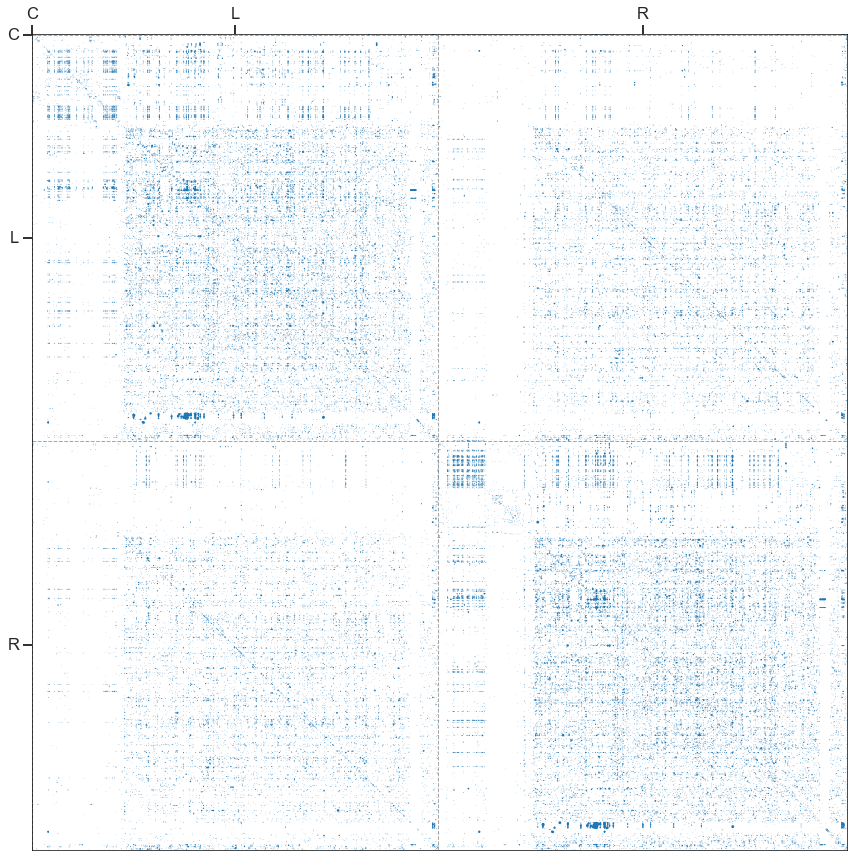

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
adjplot(
    adj,  # can also try "pass_to_ranks" here, see below
    meta=meta,
    sort_class="hemisphere",
    plot_type="scattermap",
    sizes=(0.2, 10),  # can try to leave some dynamic range for weights
    item_order="Pair ID",
    ax=ax,
)


(<matplotlib.axes._subplots.AxesSubplot at 0x13d494d10>,
 <matplotlib.axes._subplots.AxesSubplot at 0x13d494d10>)

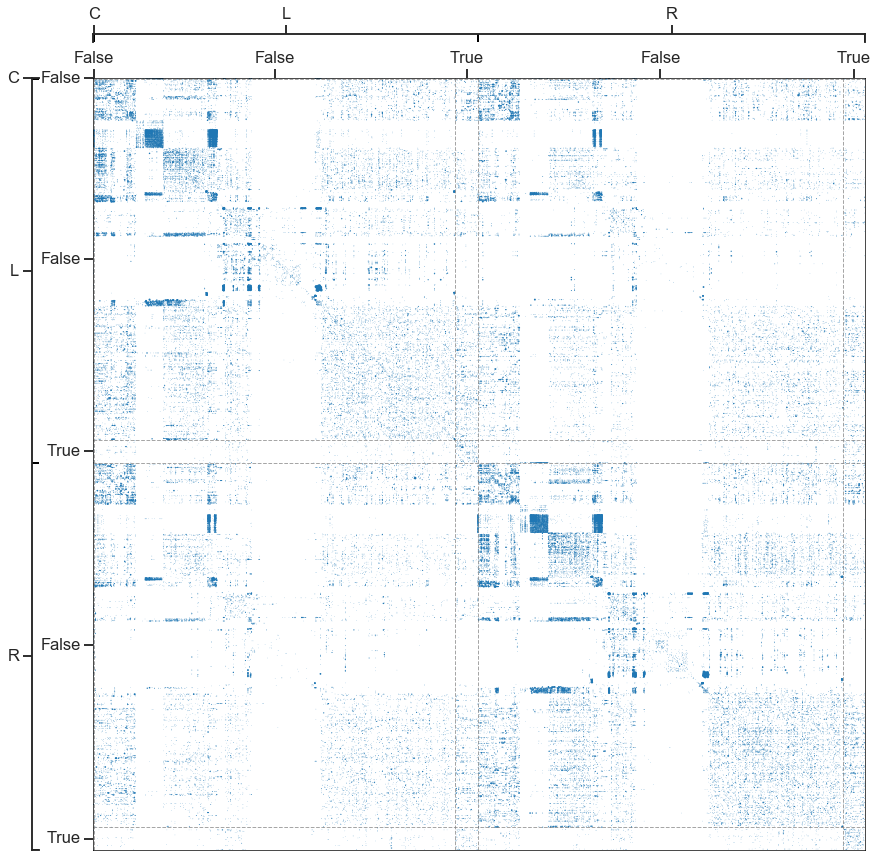

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
adjplot(
    adj,
    meta=meta,
    sort_class=[
        "hemisphere",
        "dVNC",
    ],  # sort by hemisphere and then whether or not dVNC
    plot_type="scattermap",
    sizes=(0.2, 10),  # can try to leave some dynamic range for weights
    item_order="merge_class",
    ax=ax,
    row_tick_pad=[
        0,
        0.75,
    ],  # how much padding between 1st and 2nd ticks, need a bit more in this case
)


(<matplotlib.axes._subplots.AxesSubplot at 0x13d3652d0>,
 <matplotlib.axes._axes.Axes at 0x13d374290>)

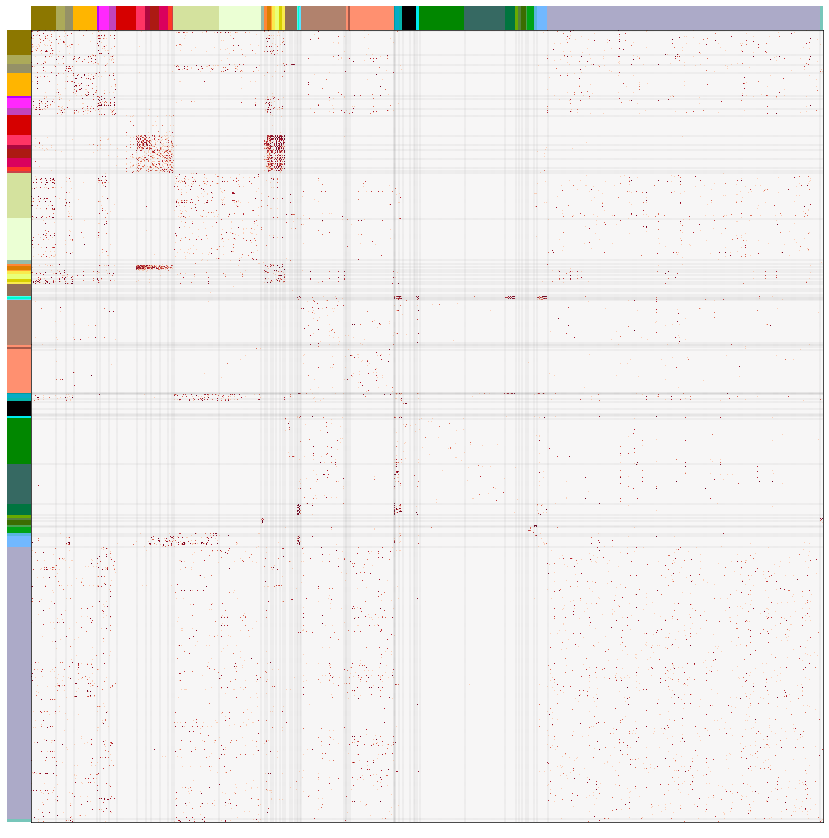

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
adjplot(
    pass_to_ranks(adj),  # rank transform the data
    meta=meta,
    sort_class="merge_class",  # group by known cell type
    plot_type="heatmap",
    ax=ax,
    cbar=False,
    ticks=False,  # turn off text for groups
    colors="merge_class",  # draw colors on borders
    palette=CLASS_COLOR_DICT,
    gridline_kws=dict(
        linewidth=0.2, color="grey", linestyle="--"
    ),  # make separators thinner
)


(<matplotlib.axes._subplots.AxesSubplot at 0x13cfbf190>,
 <matplotlib.axes._axes.Axes at 0x13ce70310>)

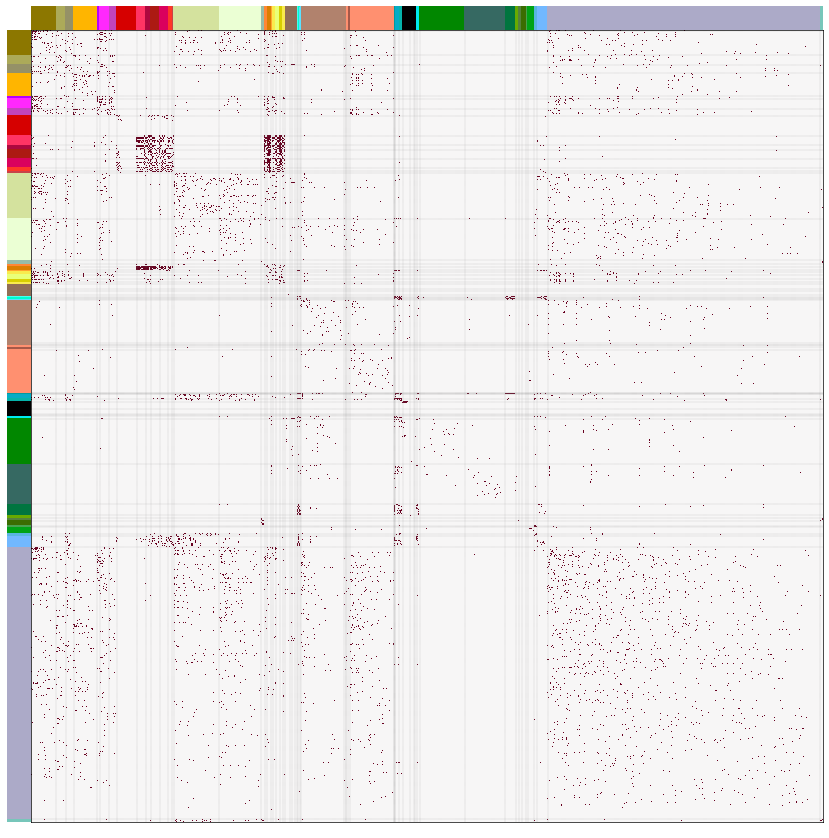

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

meta["Total degree"] = -meta["Total degree"]
adjplot(
    binarize(adj),  # binarize the data, even this may be hard to see
    meta=meta,
    sort_class="merge_class",
    plot_type="heatmap",
    item_order="Total degree",  # order nodes w/in group by degree
    ax=ax,
    cbar=False,
    ticks=False,
    colors="merge_class",
    palette=CLASS_COLOR_DICT,
    gridline_kws=dict(linewidth=0.2, color="grey", linestyle="--"),
)


 ## Can also try Graspy funcs
 I have been meaning to update them to be more like the above ones
 simple version of the above, has some more handy features (see documentation)

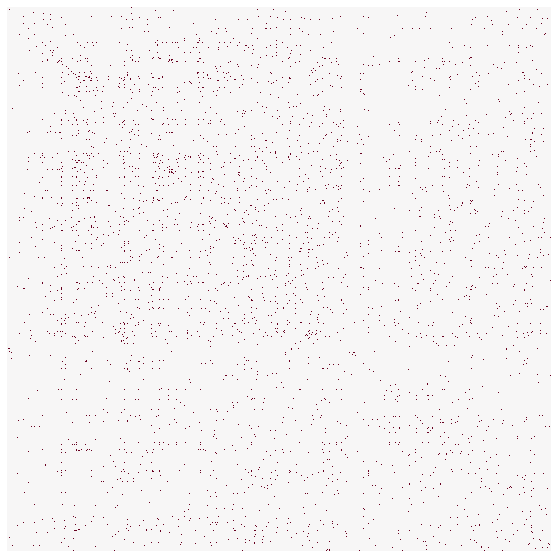

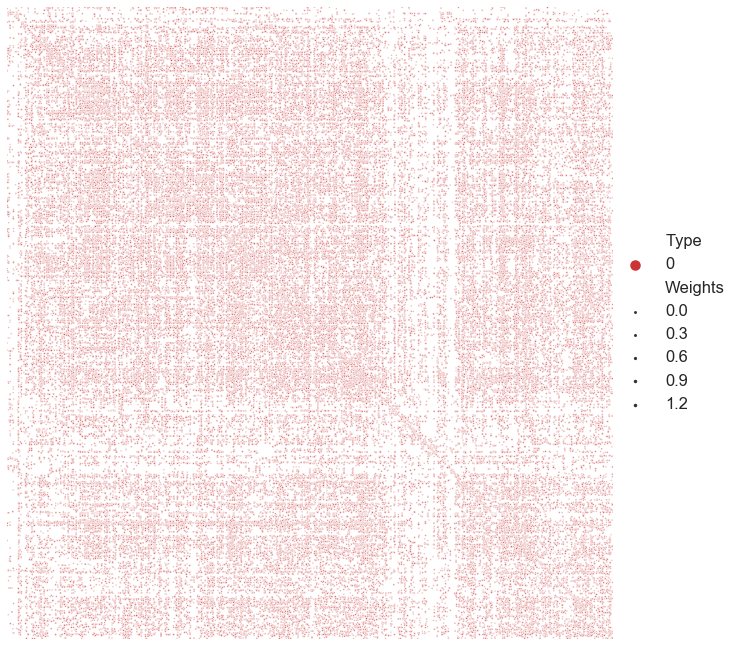

In [7]:
heatmap(adj, transform="binarize", cbar=False)

# this one is like "scattermap" but expects a list of graphs
# can plot multiple adjacencies on top of one another in different colors, for example
gridplot([adj], transform="simple-nonzero", sizes=(2, 4))
